In [1]:
# Import das Bibliotecas:
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from datetime import datetime
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import prism, noise, plot_3D, auxiliars, salve_doc

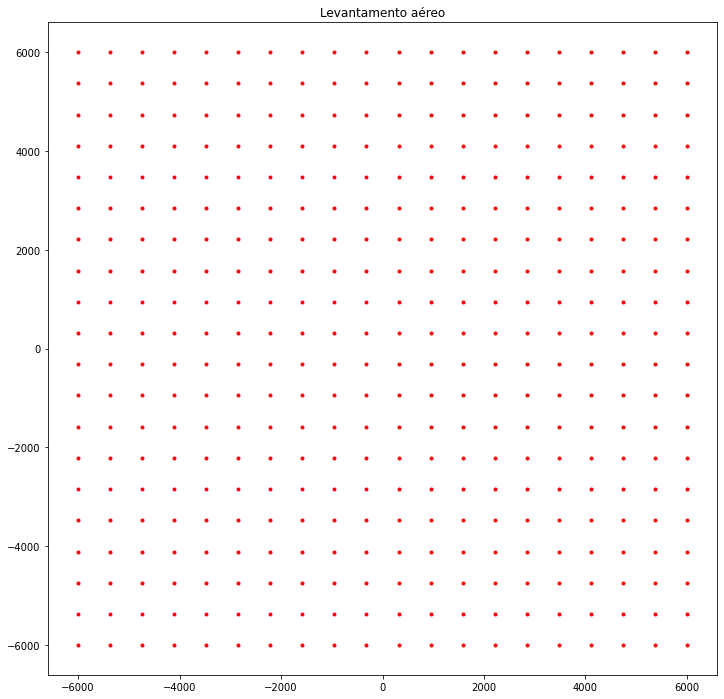

In [2]:
nx = 20 # n de observacoes na direcao x
ny = 20 # n de observacoes na direcao y
size = (nx, ny)

xmin = -6000.0 # KM
xmax = +6000.0 # KM
ymin = -6000.0 # KM
ymax = +6000.0 # KM
z = -50.0 #altura de voo, (com Z constante) em metros

dicionario = {'nx': nx,
                  'ny': ny,
                  'xmin': xmin,
                  'xmax': xmax,
                  'ymin': ymin,
                  'ymax': ymax,
                  'z': z,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**dicionario)
N = size[0]*size[1]

In [3]:
print(z)

-50.0


In [4]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-500.0, 500.0) 
y1,y2  = (-2500.0, 2500.0)
z1,z2  = (200, 2000.0)   # z eh positivo para baixo!
deltaz = 0.0
deltay = 0.0
deltax = 0.0
incl = 'positivo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'merg': y,
       'incl': 'positivo'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)

/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/../modules/plot_3D.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if merg == 'y':


/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/../modules/plot_3D.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = figure.gca(projection = '3d')
/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/../modules/plot_3D.py:55: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


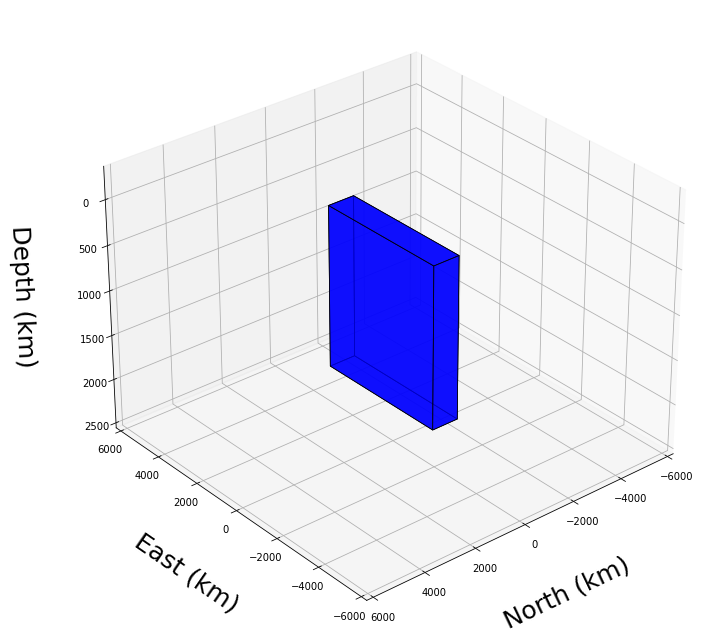

In [5]:
dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

vert1 =  plot_3D.vert_point(dic1)

color = 'b'
size = [9, 10]
view = [210,130]

prism_1 = plot_3D.plot_prism(vert1, color)

prisma1 = {'n': 1,
         'prisma': [prism_1]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

In [6]:
I = 5.0    # inclinacao do campo principal em graus
D = 70.0      # declinacao do campo principal em graus

# Propriedades magneticas da fonte crustal:
inc = 0.0 # magnetizacao puramente induzida
dec = 0.0 
Mi  = 2.0 # intensidade da magnetizacao em A/m
fonte_crustal_mag1 = [pointx[0], pointx[1], 
                     pointy[0], pointy[1],
                     pointz[0], pointz[1], Mi]

In [7]:
tfa1 = prism.prism_tf(X, Y,z, fonte_crustal_mag1, I, D, inc, dec)

In [8]:
noise_dsv = np.max(tfa1)
print(noise_dsv)
mi = 0.0
sigma = 0.05*noise_dsv
print(sigma)

#ACTn = noise.noise_gaussiana(t, mi, sigma, ACT)
tfa_final = auxiliars.noise_normal_dist(tfa1, mi, sigma)

155.8676992761262
7.79338496380631


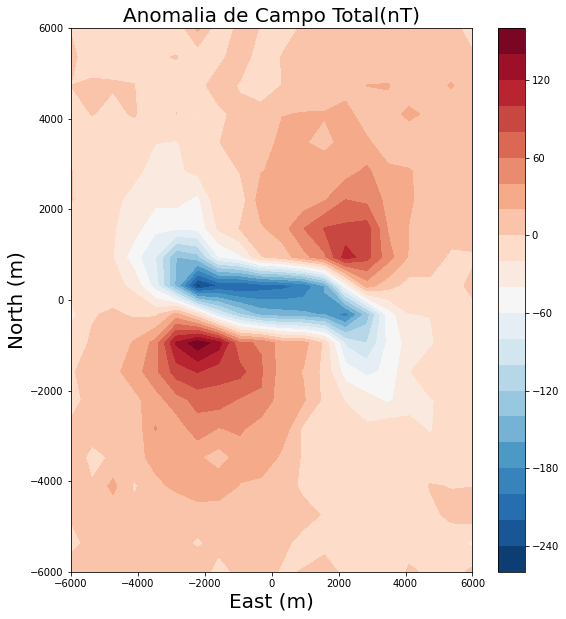

In [9]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
#copia = plt.contour(Y, X, tfa_final, levels = 16, cmap = 'jet', linewidths = 2)
#plt.clabel(copia , inline=2, fontsize=12, colors = 'k')
#plt.set(copia,'LineWidth',[5])
original = plt.contourf(Y, X, tfa_final, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


In [10]:
"""delta = 10.

dx_act = (prism.prism_tf(X + delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X - delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

dy_act = (prism.prism_tf(X, Y + delta, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y - delta, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

dz_act = (prism.prism_tf(X, Y, Z + delta, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y, Z - delta, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)
"""

'delta = 10.\n\ndx_act = (prism.prism_tf(X + delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec) -           prism.prism_tf(X - delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)\n\ndy_act = (prism.prism_tf(X, Y + delta, Z, fonte_crustal_mag1, I, D, inc, dec) -           prism.prism_tf(X, Y - delta, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)\n\ndz_act = (prism.prism_tf(X, Y, Z + delta, fonte_crustal_mag1, I, D, inc, dec) -           prism.prism_tf(X, Y, Z - delta, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)\n'

In [11]:
eta = [1., 2., 3.]
#Indice estrutural do dike


In [12]:
"""B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))
A = np.hstack((np.reshape(dx_act, (N, 1)), 
               np.reshape(dy_act, (N, 1)), 
               np.reshape(dz_act, (N, 1)), 
               np.zeros((N,1)) + eta))"""

'B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))\nA = np.hstack((np.reshape(dx_act, (N, 1)), \n               np.reshape(dy_act, (N, 1)), \n               np.reshape(dz_act, (N, 1)), \n               np.zeros((N,1)) + eta))'

In [13]:
"""result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))"""

'result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))'

In [14]:
"""print(result[0], result[1], result[2], result[3])"""

'print(result[0], result[1], result[2], result[3])'

In [15]:
"""ff = [0., 0.5, 1., 2., 3.]
print(len(ff))
zero = np.zeros((4, 4))
print(zero)"""

'ff = [0., 0.5, 1., 2., 3.]\nprint(len(ff))\nzero = np.zeros((4, 4))\nprint(zero)'

In [16]:
def matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta, tfa_final, N):
    A, B = 0., 0.
    B = np.reshape(X*dx_act + Y*dy_act + Z*dz_act + eta*tfa_final, (N, 1))
    A = np.hstack((np.reshape(dx_act, (N, 1)), 
            np.reshape(dy_act, (N, 1)), 
            np.reshape(dz_act, (N, 1)), 
            np.zeros((N,1)) + eta))
    return A, B

In [17]:
def Euler_calc(X, Y, Z, fonte_crustal_mag1, I, D, inc, dec, tfa_final, eta, N):
    
    n = len(eta)
    #Calculo das derivadas espaciais
    delta = np.abs(X[0][0] - X[0][1])*0.1

    dx_act = (prism.prism_tf(X + delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X - delta, Y, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

    dy_act = (prism.prism_tf(X, Y + delta, Z, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y - delta, Z, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)

    dz_act = (prism.prism_tf(X, Y, Z + delta, fonte_crustal_mag1, I, D, inc, dec) - \
          prism.prism_tf(X, Y, Z - delta, fonte_crustal_mag1, I, D, inc, dec))/(2.*delta)
    
    #Calculo da Deconvolução de Euler
    final_result = np.zeros((4, n))
    for i in range(n):
        A, B = matrix_Euler(X, dx_act, Y, dy_act, Z, dz_act, eta[i], tfa_final, N)
        result = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, B))
        final_result[0, i], final_result[1, i], final_result[2, i], final_result[3, i]  = result[0], result[1], result[2], result[3]
    
    return final_result

In [18]:
final_result = Euler_calc(X, Y, Z, fonte_crustal_mag1, I, D, inc, dec, tfa_final, eta, N)

In [19]:
print(final_result)

[[-9.10927739e+01 -1.11012145e+02 -1.30931517e+02]
 [ 9.50726034e+01  1.32758620e+02  1.70444636e+02]
 [ 1.10479600e+02  5.64571050e+02  1.01866250e+03]
 [ 1.45145728e+00  5.21291931e-01  2.11236815e-01]]
